In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mofgraph2vec.data.datamodule import DataModuleFactory
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import torch
import numpy as np
import pickle

/Users/xiaoqi/opt/anaconda3/envs/mofgraph2vec/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
config = OmegaConf.load("../conf/config.yaml")
config.doc2label_data = OmegaConf.load("../conf/doc2label_data/rsm.yaml")
config.doc2label_model = OmegaConf.load("../conf/doc2label_model/ensemble.yaml")

In [13]:
config.doc2label_data.label_path = "../data/data.csv"
config.doc2label_data.embedding_path = "../data/embedding_example/embedding-2000.csv"

In [14]:
dmf = DataModuleFactory(**config.doc2label_data)

2023-02-14 13:19:15.764 | INFO     | mofgraph2vec.data.datamodule:__init__:64 - Train: 2637 Valid: 294 Test: 326


In [15]:
train_ds = dmf.get_train_dataset()
valid_ds = dmf.get_valid_dataset()
test_ds = dmf.get_test_dataset()

In [16]:
model = pickle.load(open("../experiments/workflow/wandb/run-20230214_124710-ieazy1z2/files/../tmp/best_model.pkl", 'rb'))

In [35]:
pred = model.get_prediction(test_ds.vectors,target_transform=dmf.target_transform)

In [42]:
trues = test_ds.labels.numpy()

Text(0, 0.5, 'Predicted $CO_2$ $logk_H$')

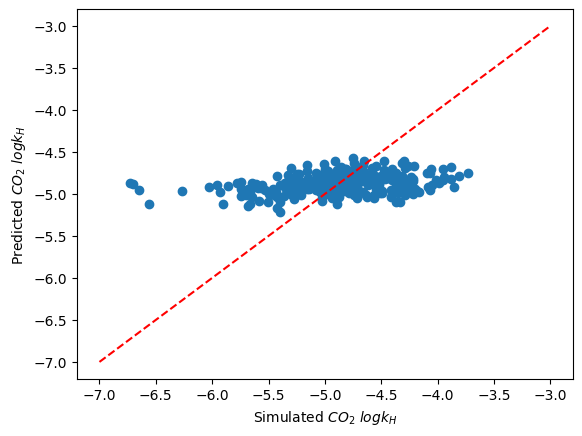

In [37]:
plt.scatter(trues, pred)
plt.plot([-7,-3], [-7,-3], "r--")
plt.xlabel("Simulated $CO_2$ $logk_H$")
plt.ylabel("Predicted $CO_2$ $logk_H$")

In [38]:
model.test(test_ds.vectors, test_ds.labels, dmf.target_transform)

{'test_mse': 0.20595019, 'test_mae': 0.3411733, 'test_r2': -16.064385502704756}